In [1]:
import sklearn.datasets as skdata
import sklearn.model_selection as skmodel
import sklearn.neighbors as skneighbors
import sklearn.metrics as skmetrics
import sklearn.naive_bayes as skbayes
import sklearn.svm as svm
import sklearn.linear_model as sklinear
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None

# Задание 1

In [2]:
data = [
        ('солнечно', True),
        ('снег', False),
        ('облачно', False),
        ('дождь', False),
        ('солнечно', True),
        ('снег', False),
        ('облачно', True),
        ('снег', False),
        ('солнечно', False),
        ('облачно', True),
        ('снег', True),
        ('солнечно', True),
        ('дождь', False),
        ('дождь', True),
        ('облачно', True),
]

probability = np.average([i[1] for i in data if i[0] == "дождь"])
probability

0.3333333333333333

# Задание 2

In [3]:
data = pd.read_csv("superhero_battles.csv", delimiter=",")
data

,Battle_title,Battle_url,Sup_1_Character,Sup_1_Name,Sup_1_Universe,Sup_2_Character,Sup_2_Name,Sup_2_Universe,Superhero_1_win,Superhero_2_win,Draw
0,Superman vs Thor,https://www.superherodb.com/90-103/,Superman,Kal-El,Prime Earth,Thor,Thor Odinson,Earth-616,46.0,51.6,2.4
1,Thing vs Colossus,https://www.superherodb.com/90-8/,Thing,Ben Grimm,Earth-616,Colossus,Peter Rasputin,Earth-616,44.3,52.9,2.8
2,Skaar vs The Flash,https://www.superherodb.com/90-9/,Skaar,Skaar,Earth-616,The Flash,Jay Garrick,Prime Earth,30.0,60.0,10.0
3,Abomination vs Darth Sidious,https://www.superherodb.com/90-518547/,Abomination,Emil Blonsky,Earth-616,Darth Sidious,Sheev Palpatine,Star Wars,50.0,50.0,0.0
4,Dazzler vs Daywing,https://www.superherodb.com/90-231336/,Dazzler,Alison Blaire,Earth-616,Daywing,Gray Dickson,NaN,10.5,89.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...
198672,Cell vs Infinity Ultron (What If...?),https://www.superherodb.com/90-669720/,Cell,Cell,DB,Infinity Ultron (What If...?),Ultron,MCU,0.0,100.0,0.0
198673,General Zod vs Captain Marvel (What If...?),https://www.superherodb.com/90-666857/,General Zod,Dru-Zod,DCEU,Captain Marvel (What If...?),Carol Danvers,MCU,20.0,80.0,0.0
198674,Majin Buu vs Infinity Ultron (What If...?),https://www.superherodb.com/90-666565/,Majin Buu,Majin Buu,DB,Infinity Ultron (What If...?),Ultron,MCU,0.0,100.0,0.0
198675,Kid Buu vs Infinity Ultron (What If...?),https://www.superherodb.com/90-666564/,Kid Buu,Majin Buu,DB,Infinity Ultron (What If...?),Ultron,MCU,0.0,100.0,0.0


In [4]:
data.drop(["Battle_title", "Battle_url", "Sup_1_Universe", "Sup_2_Universe", "Sup_1_Name", "Sup_2_Name"], axis=1, inplace=True)
data.rename(columns={"Superhero_1_win": "Win", "Superhero_2_win": "Defeat", "Sup_1_Character": "Character_1", "Sup_2_Character": "Character_2"}, inplace=True)

In [5]:
character_map = list(enumerate([set(data.Character_1.to_list()).update(data.Character_2.to_list())]))
character_map = list(set(data.Character_1.to_list()).union(set(data.Character_2.to_list())))
character_map = dict(zip(character_map, range(len(character_map))))
character_map

{'Ultraman Belial (Atrocious)': 0,
 'Takuto Tatsunagi': 1,
 'King Cerberus': 2,
 'Pippi Longstocking': 3,
 'Vibe': 4,
 'Elaine Belloc (Angel)': 5,
 'Moon Presence': 6,
 'Vaati': 7,
 'Misty Tredwell (Dark signer)': 8,
 'The All-Powerful': 9,
 'Johnny Bravo': 10,
 'Iuz The Evil': 11,
 'Thula': 12,
 'Death Dealer': 13,
 'Exitar The Executioner': 14,
 'Kangaroo II': 15,
 'Hellboy': 16,
 'Buck': 17,
 'Broly': 18,
 'Lo-Pan': 19,
 'Supe Terrorist': 20,
 'Francis F.': 21,
 'Playable Caster': 22,
 'Ruvik': 23,
 'MacGyver': 24,
 'Infernal Hulk': 25,
 'Old Man Hulk': 26,
 'Zazz': 27,
 'Carnage (Dark)': 28,
 'Mimir': 29,
 'Yhoundeh': 30,
 'The Corinthian': 31,
 'Princess Azula': 32,
 'Tails Doll': 33,
 'Dogramag': 34,
 'Nadine Ross': 35,
 'Gar Saxon': 36,
 'Zoisite': 37,
 'Saya Otonashi': 38,
 'Lemillion': 39,
 'Madame Xanadu': 40,
 'Master Xehanort': 41,
 'Goddess Of Thunder': 42,
 "Doctor Strange (Zom's Power)": 43,
 'Alex Munday': 44,
 'Ryze': 45,
 'Milkman Man': 46,
 'Rodan (Singular Point)': 

In [6]:
Y = data[["Win", "Draw", "Defeat"]]
X = data[["Character_1", "Character_2"]]
X.Character_1 = X.Character_1.map(character_map)
X.Character_2 = X.Character_2.map(character_map)
X

,Character_1,Character_2
0,641,11111
1,5040,10435
2,10632,5836
3,8812,10564
4,7461,6438
...,...,...
198672,1920,4601
198673,6574,11373
198674,9624,4601
198675,7609,4601


In [7]:
results = tuple(values.Win + values.Draw * 0.5 for label, values in Y.iterrows())
results

(47.2,
 45.7,
 35.0,
 50.0,
 10.5,
 5.3,
 24.999999999999996,
 87.5,
 94.1,
 81.25,
 51.9,
 93.3,
 89.5,
 8.9,
 100.0,
 27.3,
 75.0,
 50.0,
 100.0,
 14.3,
 100.0,
 9.1,
 0.0,
 12.5,
 22.2,
 0.0,
 100.0,
 100.0,
 27.3,
 100.0,
 9.450000000000001,
 70.0,
 36.4,
 88.9,
 100.0,
 0.0,
 76.5,
 100.0,
 0.0,
 100.0,
 100.0,
 10.0,
 8.3,
 100.0,
 100.0,
 100.0,
 0.0,
 33.3,
 50.0,
 100.0,
 0.0,
 83.3,
 0.0,
 33.3,
 50.0,
 0.0,
 100.0,
 60.0,
 100.0,
 0.0,
 50.0,
 100.0,
 0.0,
 75.0,
 0.0,
 0.0,
 0.0,
 0.0,
 50.0,
 100.0,
 50.0,
 8.350000000000001,
 0.0,
 50.0,
 100.0,
 0.0,
 100.0,
 0.0,
 83.3,
 100.0,
 0.0,
 75.0,
 100.0,
 100.0,
 0.0,
 100.0,
 100.0,
 100.0,
 50.0,
 50.0,
 50.0,
 100.0,
 100.0,
 100.0,
 0.0,
 100.0,
 16.7,
 50.0,
 0.0,
 50.0,
 20.0,
 0.0,
 50.0,
 0.0,
 100.0,
 66.7,
 0.0,
 100.0,
 0.0,
 0.0,
 60.0,
 100.0,
 0.0,
 0.0,
 0.0,
 0.0,
 33.3,
 33.3,
 0.0,
 0.0,
 50.0,
 20.0,
 0.0,
 75.0,
 100.0,
 75.0,
 50.0,
 0.0,
 0.0,
 100.0,
 33.3,
 100.0,
 75.0,
 80.0,
 100.0,
 50.0,
 0.0,
 10

In [8]:
Y.loc[:, "Win_Probability"] = results
Y

,Win,Draw,Defeat,Win_Probability
0,46.0,2.4,51.6,47.2
1,44.3,2.8,52.9,45.7
2,30.0,10.0,60.0,35.0
3,50.0,0.0,50.0,50.0
4,10.5,0.0,89.5,10.5
...,...,...,...,...
198672,0.0,0.0,100.0,0.0
198673,20.0,0.0,80.0,20.0
198674,0.0,0.0,100.0,0.0
198675,0.0,0.0,100.0,0.0


In [9]:
Y = Y.Win_Probability.apply(lambda x: 1 if x > 52.5 else -1 if x < 47.5 else 0)
Y

0        -1
1        -1
2        -1
3         0
4        -1
         ..
198672   -1
198673   -1
198674   -1
198675   -1
198676    1
Name: Win_Probability, Length: 198677, dtype: int64

In [10]:
X_train, X_test, Y_train, Y_test = skmodel.train_test_split(X, Y, test_size=0.2, random_state=14, stratify=Y)

model = sklinear.LogisticRegression().fit(X_train, Y_train)
prediction = model.predict(X_test)

neighbor_model = skneighbors.KNeighborsClassifier(n_neighbors=15, metric='minkowski', p=2, weights="distance").fit(X_train, Y_train)

In [11]:
prediction: np.ndarray = neighbor_model.predict(X_test)

In [12]:
skmetrics.accuracy_score(Y_test, prediction)

0.8492550835514395

In [26]:
print(skmetrics.classification_report(Y_test, prediction))

              precision    recall  f1-score   support

          -1       0.84      0.85      0.85     16669
           0       0.86      0.75      0.80      4138
           1       0.85      0.87      0.86     18929

    accuracy                           0.85     39736
   macro avg       0.85      0.82      0.84     39736
weighted avg       0.85      0.85      0.85     39736



ImportError: Missing optional dependency 'xarray'.  Use pip or conda to install xarray.

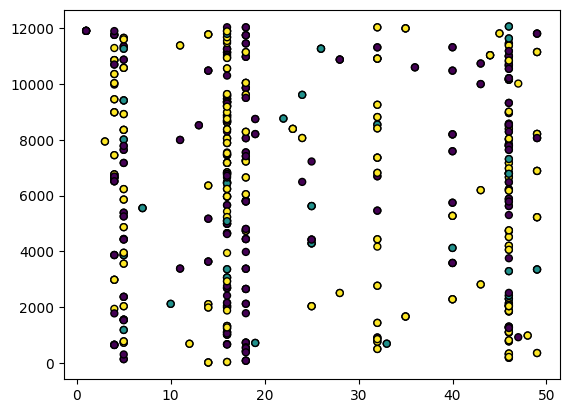

In [39]:
X_ = X[(X["Character_1"] < 50)] # test
Y_ = Y[(X["Character_1"] < 50)]

plt.scatter(X_.loc[:, "Character_1"], X_.loc[:, "Character_2"], marker="o", c=Y_, s=25, edgecolor="k")
plt.show()

In [216]:
# skmetrics.roc_auc_score(Y_test, prediction)

In [217]:
bayes_model = skbayes.GaussianNB().fit(X_train, Y_train)
prediction = bayes_model.predict(X_test)

In [218]:
skmetrics.accuracy_score(Y_test, prediction)

0.47853331991141534

In [219]:
print(skmetrics.classification_report(Y_test, prediction))

              precision    recall  f1-score   support

          -1       0.47      0.04      0.07     16669
           0       0.00      0.00      0.00      4138
           1       0.48      0.97      0.64     18929

    accuracy                           0.48     39736
   macro avg       0.32      0.34      0.24     39736
weighted avg       0.43      0.48      0.34     39736



/home/andrew/Projects/2023_1/machine_learning/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andrew/Projects/2023_1/machine_learning/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andrew/Projects/2023_1/machine_learning/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [220]:
logistics_model = sklinear.LogisticRegression().fit(X_train, Y_train)
prediction = logistics_model.predict(X_test)

In [221]:
skmetrics.accuracy_score(Y_test, prediction)

0.4778286692168311

In [222]:
print(skmetrics.classification_report(Y_test, prediction))

              precision    recall  f1-score   support

          -1       0.45      0.14      0.21     16669
           0       0.00      0.00      0.00      4138
           1       0.48      0.88      0.62     18929

    accuracy                           0.48     39736
   macro avg       0.31      0.34      0.28     39736
weighted avg       0.42      0.48      0.39     39736



/home/andrew/Projects/2023_1/machine_learning/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andrew/Projects/2023_1/machine_learning/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/andrew/Projects/2023_1/machine_learning/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [223]:
svc_model = svm.SVC(max_iter=300).fit(X_train, Y_train)
prediction = svc_model.predict(X_test)

/home/andrew/Projects/2023_1/machine_learning/lib/python3.10/site-packages/sklearn/svm/_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [224]:
skmetrics.accuracy_score(Y_test, prediction)

0.35592409905375477

In [225]:
print(skmetrics.classification_report(Y_test, prediction))

              precision    recall  f1-score   support

          -1       0.42      0.59      0.49     16669
           0       0.10      0.24      0.15      4138
           1       0.49      0.17      0.25     18929

    accuracy                           0.36     39736
   macro avg       0.34      0.34      0.30     39736
weighted avg       0.42      0.36      0.34     39736

